<a href="https://colab.research.google.com/github/rafaelrlima/aula7_rede_neural-densa/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSI5796 Lição de casa Fashion_MNIST

In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
import numpy as np
import sys
import matplotlib.pyplot as plt


Carregando Fashion MNIST


In [2]:
(AX, AY), (QX, QY) = fashion_mnist.load_data()


In [3]:
AX=255-AX; QX=255-QX
nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses)
QY2 = keras.utils.to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2] #28, 28

AX = AX.astype('float32') / 255.0 # 0 a 1
QX = QX.astype('float32') / 255.0 # 0 a 1

model = Sequential()
model.add(Flatten(input_shape=(nl,nc)))
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

opt=optimizers.Adam()
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

#old loss categorical_crossentropy


Treinando o Modelo

In [4]:
#model.fit(AX, AY2, 
#          batch_size=100, 
#          epochs=10, 
#          verbose=True);

model.fit(AX, AY2, 
          epochs=10);

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7708 - accuracy: 0.7238
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4918 - accuracy: 0.8191
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4332 - accuracy: 0.8402
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4151 - accuracy: 0.8468
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3859 - accuracy: 0.8574
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8580
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3587 - accuracy: 0.8664
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3463 - accuracy: 0.8719
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.8732
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.331

Avaliação da acurácia do modelo


In [5]:
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#model.save('mlp2.h5')


Test loss: 0.3685632050037384
Test accuracy: 0.864300012588501


Predições

In [6]:
predictions = model.predict(QX)
predictions[0]

array([2.9409162e-07, 3.1749508e-08, 1.2895317e-09, 1.0238623e-08,
       7.5342001e-08, 7.0307530e-02, 1.6011045e-07, 3.6124405e-02,
       3.1017595e-07, 8.9356720e-01], dtype=float32)

Plotando as Predições

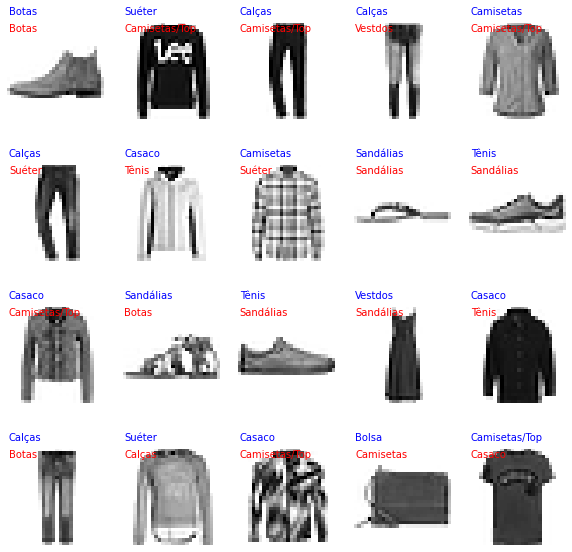

In [7]:
class_names = ['Camisetas/Top', 'Calças', 'Suéter', 'Vestdos', 'Casaco',
               'Sandálias', 'Camisetas', 'Tênis', 'Bolsa', 'Botas']

f = plt.figure(figsize=(10,10))
for i in range(20):
  f.add_subplot(4,5,i+1)
  plt.imshow(QX[i], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.axis("off");
  plt.text(0,-3,class_names[QY[i]],color="b")
  plt.text(0, 2,class_names[AY[i]],color="r")
  #plt.savefig("nome_imagem.png")
plt.show()
